# Домашнее задание

### Владимир Никифоров

https://www.kaggle.com/vladimirn/titanic-crossvalidation-rf?scriptVersionId=22497035

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# Any results you write to the current directory are saved as output.

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
N_FOLDS = 10
RANDOM_STATE = 777

In [4]:
train = pd.read_csv("../data/train.csv").drop(['Name','Ticket', 'Cabin'], axis=1)
test = pd.read_csv("../data/test.csv").drop(['Name','Ticket', 'Cabin'], axis=1)

In [5]:
train = train.apply(lambda x: x.fillna(x.mean()) if x.dtype != 'object' else x, axis=0)
test = test.apply(lambda x: x.fillna(x.mean()) if x.dtype != 'object' else x, axis=0)

In [6]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [7]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [8]:
train = pd.get_dummies(train, columns = ['Pclass','Sex','SibSp','Parch','Embarked'])
test = pd.get_dummies(test, columns = ['Pclass','Sex','SibSp','Parch','Embarked'])

In [9]:
train.dropna(inplace=True)

In [10]:
X_train, y_train = train.drop(['PassengerId','Survived'], axis=1), train['Survived']

In [11]:
depths = np.arange(5,10,20)
grid = {'max_depth': depths}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='neg_log_loss', cv=N_FOLDS)

In [12]:
%%time
gridsearch.fit(X_train, y_train)

CPU times: user 94.6 ms, sys: 930 µs, total: 95.5 ms
Wall time: 94.6 ms


/home/truename/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': array([5])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=

In [13]:
test

,PassengerId,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
0,892,34.50000,7.8292,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,893,47.00000,7.0000,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,894,62.00000,9.6875,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,895,27.00000,8.6625,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,896,22.00000,12.2875,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,30.27259,8.0500,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
414,1306,39.00000,108.9000,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
415,1307,38.50000,7.2500,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
416,1308,30.27259,8.0500,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
best_model = gridsearch.best_estimator_

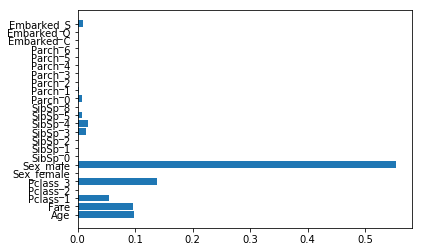

In [15]:
plt.barh(np.arange(len(best_model.feature_importances_)), best_model.feature_importances_)
plt.yticks(np.arange(len(X_train.columns)),X_train.columns);

The most important features are: Age, Fare, Pclass_1, Pclass_3, Sex_female

In [20]:
!pip install pydotplus

You are using pip version 19.0.2, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [23]:
from sklearn.tree import export_graphviz
import pydotplus

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    dot_data = export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names)
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_pdf("tree-vis.pdf")
    print(dot_data)

In [24]:
get_tree_dot_view(best_model, list(X_train.columns), ['NotSurv','Surv'])

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="Sex_male <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = NotSurv", fillcolor="#f5cfb4"] ;
1 [label="Pclass_3 <= 0.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]\nclass = Surv", fillcolor="#7ebfee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Age <= 2.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]\nclass = Surv", fillcolor="#44a2e6"] ;
1 -> 2 ;
3 [label="Pclass_1 <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = NotSurv", fillcolor="#ffffff"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Surv", fillcolor="#399de5"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = NotSurv", fillcolor="#e58139"] ;
3 -> 5 ;
6 [label="Fare <= 28.856\ngini = 0.091\nsamples = 168\nvalue = [8, 160]\nclass = Surv", fillcolor="#43a2e6"] ;
2 -> 6 ;
7 [label="Fare <= 28.231\ngini = 0.182\nsamples = 69\nvalue = [7, 62]\nclass = Surv", fillco

In [20]:
depths = np.arange(5,10,20,100)
estimators = [10,20,50,100,200,1000]
grid = {'max_depth': depths, 'n_estimators': estimators, 'n_jobs': [-1]}
gridsearch = GridSearchCV(RandomForestClassifier(), grid, scoring='neg_log_loss', cv=N_FOLDS)

In [21]:
%%time
gridsearch.fit(X_train, y_train)

CPU times: user 1.44 s, sys: 4 ms, total: 1.45 s
Wall time: 1.45 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 26 columns):
PassengerId    418 non-null int64
Age            418 non-null float64
Fare           418 non-null float64
Pclass_1       418 non-null uint8
Pclass_2       418 non-null uint8
Pclass_3       418 non-null uint8
Sex_female     418 non-null uint8
Sex_male       418 non-null uint8
SibSp_0        418 non-null uint8
SibSp_1        418 non-null uint8
SibSp_2        418 non-null uint8
SibSp_3        418 non-null uint8
SibSp_4        418 non-null uint8
SibSp_5        418 non-null uint8
SibSp_8        418 non-null uint8
Parch_0        418 non-null uint8
Parch_1        418 non-null uint8
Parch_2        418 non-null uint8
Parch_3        418 non-null uint8
Parch_4        418 non-null uint8
Parch_5        418 non-null uint8
Parch_6        418 non-null uint8
Parch_9        418 non-null uint8
Embarked_C     418 non-null uint8
Embarked_Q     418 non-null uint8
Embarked_S     418 non-null uint8
dtypes:

In [23]:
best_model = gridsearch.best_estimator_
y_pred = best_model.predict(test[train.drop('Survived',axis=1).columns].drop('PassengerId', axis=1))

In [24]:
res = pd.DataFrame()
res['PassengerId'] = test['PassengerId']
res['Survived'] = y_pred
res.to_csv('submission.csv', index=False)